In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gdown

In [ ]:
file_id = '1KRJfjxfqr_PQd1PTZd_-pxKptfIGJk_T'
url = f'https://drive.google.com/uc?id={file_id}'
output = 'car.csv'
gdown.download(url, output, quiet=True)
car = pd.read_csv(output)

# **Chuẩn bị và Hiểu bối cảnh**

## Mục tiêu dự án


Dự đoán giá xe được thu thập từ Craigslist thông qua dữ liệu tại

## Mô tả các thuộc tính

| # | Thuộc tính| Mô tả |
|-----|----------------|-----------------------------------------------------------------------------|
| 0  | `id`  | Mã định danh duy nhất cho mỗi tin đăng |
| 1  | `url` | Đường dẫn URL đến tin đăng gốc trên Craigslist |
| 2  | `region` | Khu vực trên Craigslist nơi xe được đăng bán |
| 3  | `region_url` | Đường dẫn URL đến khu vực cụ thể trên Craigslist |
| 4  | `price` | Giá bán yêu cầu của xe tính bằng USD |
| 5  | `year`  | Năm sản xuất của xe |
| 6  | `manufacturer` | Thương hiệu hoặc nhà sản xuất xe |
| 7  | `model` | Dòng xe (model) cụ thể |
| 8  | `condition`| Tình trạng xe (ví dụ: xuất sắc, tốt, khá) |
| 9  | `cylinders` | Số lượng xi-lanh trong động cơ xe  |
| 10 | `fuel`| Loại nhiên liệu xe sử dụng (ví dụ: xăng, dầu diesel, điện) |
| 11 | `odometer`  | Số dặm xe đã đi (số công-tơ-mét/quãng đường đã di chuyển) |
| 12 | `title_status` | Tình trạng pháp lý của giấy tờ xe (ví dụ: giấy tờ sạch, xe phục hồi) |
| 13| `transmission` | Loại hộp số (ví dụ: tự động, số sàn) |
| 14 | `VIN` | Số nhận dạng xe (Số VIN) |
| 15 | `drive` | Hệ dẫn động (ví dụ: cầu trước fwd, cầu sau rwd, 2 cầu 4wd)|
| 16 | `size`  | Phân loại kích thước xe (ví dụ: cỡ lớn, cỡ nhỏ) |
| 17 | `type`  | Kiểu dáng thân xe (ví dụ: sedan, SUV, bán tải) |
| 18 | `paint_color` | Màu sơn ngoại thất của xe |
| 19 | `image_url`   | Đường dẫn URL đến hình ảnh chính của tin đăng  |
| 20 | `description` | Toàn bộ văn bản mô tả do người bán cung cấp |
| 21 | `county`  | Quận/Huyện nơi xe được đăng bán  |
| 22 | `state` | Tên viết tắt tiểu bang (Mỹ) nơi xe được đăng bán (ví dụ: ca, ny) |
| 23 | `lat` | Tọa độ vĩ độ của địa điểm  |
| 24 | `long`| Tọa độ kinh độ của địa điểm |
| 25 | `posting_date` | Ngày và giờ khi tin đăng được tạo  |

# **Kiểm tra cấu trúc dữ liệu**

In [ ]:
# Kiểm tra shape, thông tin và kiểu dữ liệu của các thuộc tính
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [ ]:
car.sample(5)

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
409396,7316390438,https://seattle.craigslist.org/sno/ctd/d/seatt...,seattle-tacoma,https://seattle.craigslist.org,7991,2009.0,mercedes-benz,c-class c 300 spo,NaN,NaN,...,NaN,sedan,NaN,https://images.craigslist.org/00l0l_2IohW5tLvD...,Trucks Plus NW STOCK #: CA...,NaN,wa,47.704548,-122.301629,2021-05-03T12:57:53-0700
185287,7309963272,https://westmd.craigslist.org/ctd/d/finksburg-...,western maryland,https://westmd.craigslist.org,43499,2015.0,ford,f-250 crew cab lariat 4x4,NaN,8 cylinders,...,NaN,pickup,black,https://images.craigslist.org/01515_lKt76HXj7k...,2015 Ford F-250 Crew Cab Lariat 4X4 Truck2015...,NaN,md,39.512938,-76.909548,2021-04-20T15:00:29-0400
418091,7314859817,https://janesville.craigslist.org/ctd/d/beloit...,janesville,https://janesville.craigslist.org,6495,2011.0,chevrolet,cruze eco,excellent,4 cylinders,...,NaN,NaN,silver,https://images.craigslist.org/00Q0Q_lLkBug3tC2...,🚗🚗2011 Chevrolet Cruze ECO🚗🚗 Vehicle Details...,NaN,wi,42.498852,-89.023268,2021-04-30T11:29:55-0500
30634,7315743004,https://inlandempire.craigslist.org/cto/d/teme...,inland empire,https://inlandempire.craigslist.org,42000,2017.0,toyota,tundra,excellent,8 cylinders,...,NaN,NaN,NaN,https://images.craigslist.org/01313_ZwxQdqqWLF...,2017 Quicksand Tundra 5.7L V8 SR5 2WD 5 1/2ft ...,NaN,ca,33.498300,-117.095800,2021-05-02T07:52:11-0700
172330,7316222939,https://louisville.craigslist.org/ctd/d/willia...,louisville,https://louisville.craigslist.org,29448,2017.0,toyota,tacoma,NaN,4 cylinders,...,NaN,truck,NaN,https://images.craigslist.org/00f0f_cmOOklYRCn...,"2017 Toyota Tacoma SR5 -- $29,448 ☎ Call...",NaN,ky,38.678459,-84.600891,2021-05-03T11:38:31-0400


# **Đánh giá chất lượng dữ liệu**

## Missing Values

In [ ]:
# Sắp xếp tỷ lệ dữ liệu thiếu giảm dần
print(round(car.isnull().sum().sort_values(ascending=False)/len(car)*100,2))

county          100.00
size             71.77
cylinders        41.62
condition        40.79
VIN              37.73
drive            30.59
paint_color      30.50
type             21.75
manufacturer      4.13
title_status      1.93
lat               1.53
long              1.53
model             1.24
odometer          1.03
fuel              0.71
transmission      0.60
year              0.28
description       0.02
posting_date      0.02
image_url         0.02
region_url        0.00
url               0.00
id                0.00
region            0.00
price             0.00
state             0.00
dtype: float64


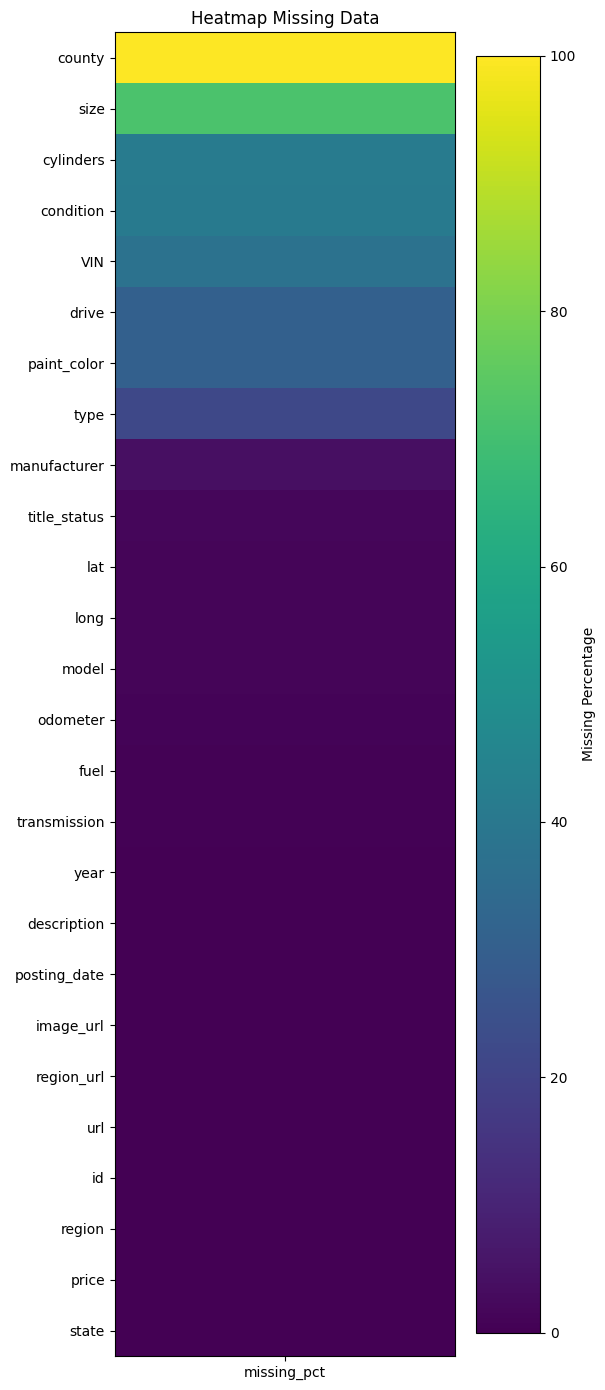

In [ ]:
missing_data = car.isnull().sum().sort_values(ascending=False)
missing_pct = (missing_data / len(car)) * 100

df = pd.DataFrame({"missing_pct": missing_pct.round(2)})

plt.figure(figsize=(6, 14))
plt.imshow(df, aspect="auto")
plt.colorbar(label="Missing Percentage")
plt.xticks([0], ["missing_pct"])
plt.yticks(range(len(df.index)), df.index)
plt.title("Heatmap Missing Data")
plt.tight_layout()
plt.show()

## Duplicates

In [ ]:
car.duplicated().sum()

np.int64(0)

## **Nhận xét**

**Loại bỏ các cột sau**:
*   `id`, `url`, `region_url`, `image_url`: không giúp ích cho mô hình.
*   `county`, `size`: tỷ lệ dữ liệu thiếu quá nhiều (> 40%), nếu sử dụng điền khuyết không cẩn thận sẽ dẫn đến sai lệch mô hình.
*   `region`: sử dụng `state`, `lat` và `long` vì `region` là khu vực theo Craigslist nên không bao quán như `state` cũng không chi tiết như `lat` và `long`.
*   `VIN` và `description`: cần xử lý chuỗi phức tạp để rút ra một số thông tin về xe, loại bỏ để đơn giản hoá.





In [ ]:
car_copy = car.copy()
car_copy.drop(columns=['id','url','region_url','image_url','county','size','region','VIN','description'],inplace=True)

# **Phân tích đơn biến**

## Thuộc tính số

In [ ]:
numerical_data = car_copy.select_dtypes(include='number')
numerical_features=numerical_data.columns.tolist()

print(f'There are {len(numerical_features)} numerical features:', '\n')
print(numerical_features)

There are 5 numerical features: 

['price', 'year', 'odometer', 'lat', 'long']


In [ ]:
numerical_data.describe()

,price,year,odometer,lat,long
count,4.268800e+05,425675.000000,4.224800e+05,420331.000000,420331.000000
mean,7.519903e+04,2011.235191,9.804333e+04,38.493940,-94.748599
std,1.218228e+07,9.452120,2.138815e+05,5.841533,18.365462
min,0.000000e+00,1900.000000,0.000000e+00,-84.122245,-159.827728
25%,5.900000e+03,2008.000000,3.770400e+04,34.601900,-111.939847
50%,1.395000e+04,2013.000000,8.554800e+04,39.150100,-88.432600
75%,2.648575e+04,2017.000000,1.335425e+05,42.398900,-80.832039
max,3.736929e+09,2022.000000,1.000000e+07,82.390818,173.885502


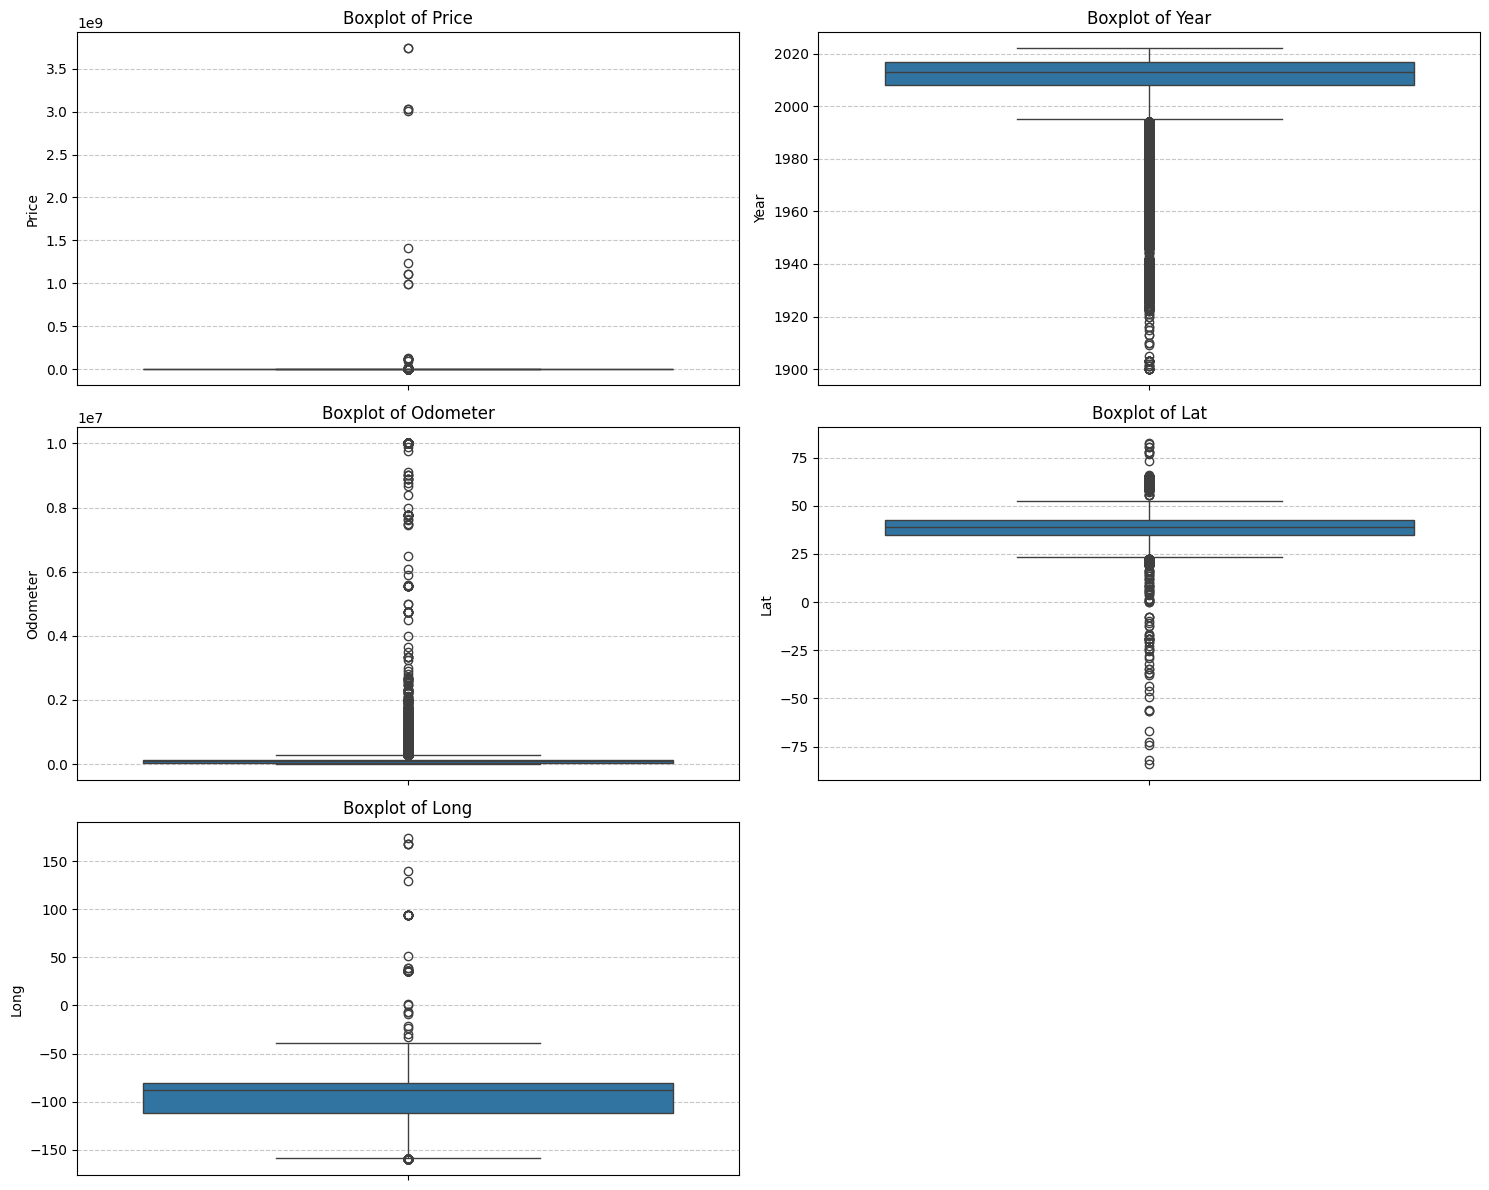

In [ ]:
plt.figure(figsize=(15, 12))

for i, feature in enumerate(numerical_features):
    plt.subplot(3, 2, i + 1) # Adjust subplot grid based on the number of numerical features
    sns.boxplot(y=car_copy[feature].dropna())
    plt.title(f'Boxplot of {feature.replace("_", " ").title()}')
    plt.ylabel(feature.replace("_", " ").title())
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

### Thuộc tính đích `price`

In [ ]:
print(car_copy['price'].describe())

count    4.268800e+05
mean     7.519903e+04
std      1.218228e+07
min      0.000000e+00
25%      5.900000e+03
50%      1.395000e+04
75%      2.648575e+04
max      3.736929e+09
Name: price, dtype: float64


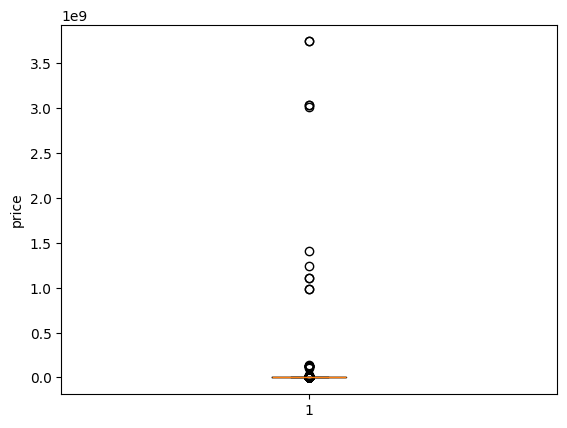

In [ ]:
plt.boxplot(car_copy['price'].dropna())
plt.ylabel('price')
plt.show()

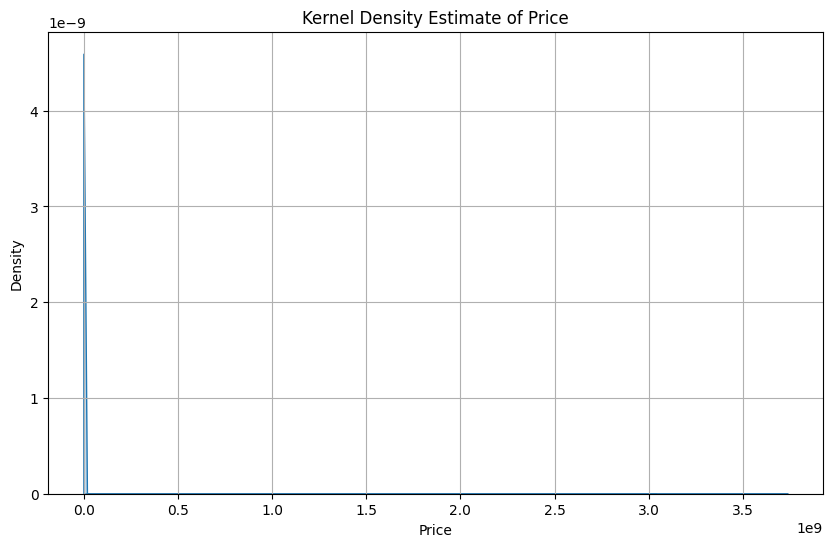

In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(car_copy['price'].dropna(), fill=True)
plt.title('Kernel Density Estimate of Price')
plt.xlabel('Price')
plt.ylabel('Density')
plt.grid(True)
plt.show()

Thuộc tính lệch phải nặng, có nhiều giá trị ngoại lai, nhưng không thể áp dụng các phép bỏ giá trị ngoại lai thông thường như IQR hay Z-Score vì sẽ làm sai lệch mô hình. Do đó, loại bỏ các giá trị `price` quá cao và quá thấp dựa vào thực tế. Chọn bỏ giá trị `price` nhỏ hơn 100 hoặc lớn hơn 100000.

Vì phải tạo cột mới và không sử dụng trực tiếp cột `year` nên xử lý cột `posting_date` trước.

### `posting_date`

In [ ]:
car_copy['posting_date'].isna().sum()

np.int64(68)

In [ ]:
car_copy['posting_date']

,posting_date
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
426875,2021-04-04T03:21:31-0600
426876,2021-04-04T03:21:29-0600
426877,2021-04-04T03:21:17-0600
426878,2021-04-04T03:21:11-0600




*   Tỷ lệ dữ liệu thiếu ít nên xoá những dòng có giá trị thiếu.
*   Chuyển dữ liệu sang kiểu ngày tháng bằng `pd.to_datetime` với `utc=True`.
*   Tách dữ liệu năm để tính toán cột `age` với cột `year` bằng `dt.year`.



In [ ]:
car_copy['posting_date'] = pd.to_datetime(car_copy['posting_date'], utc=True)

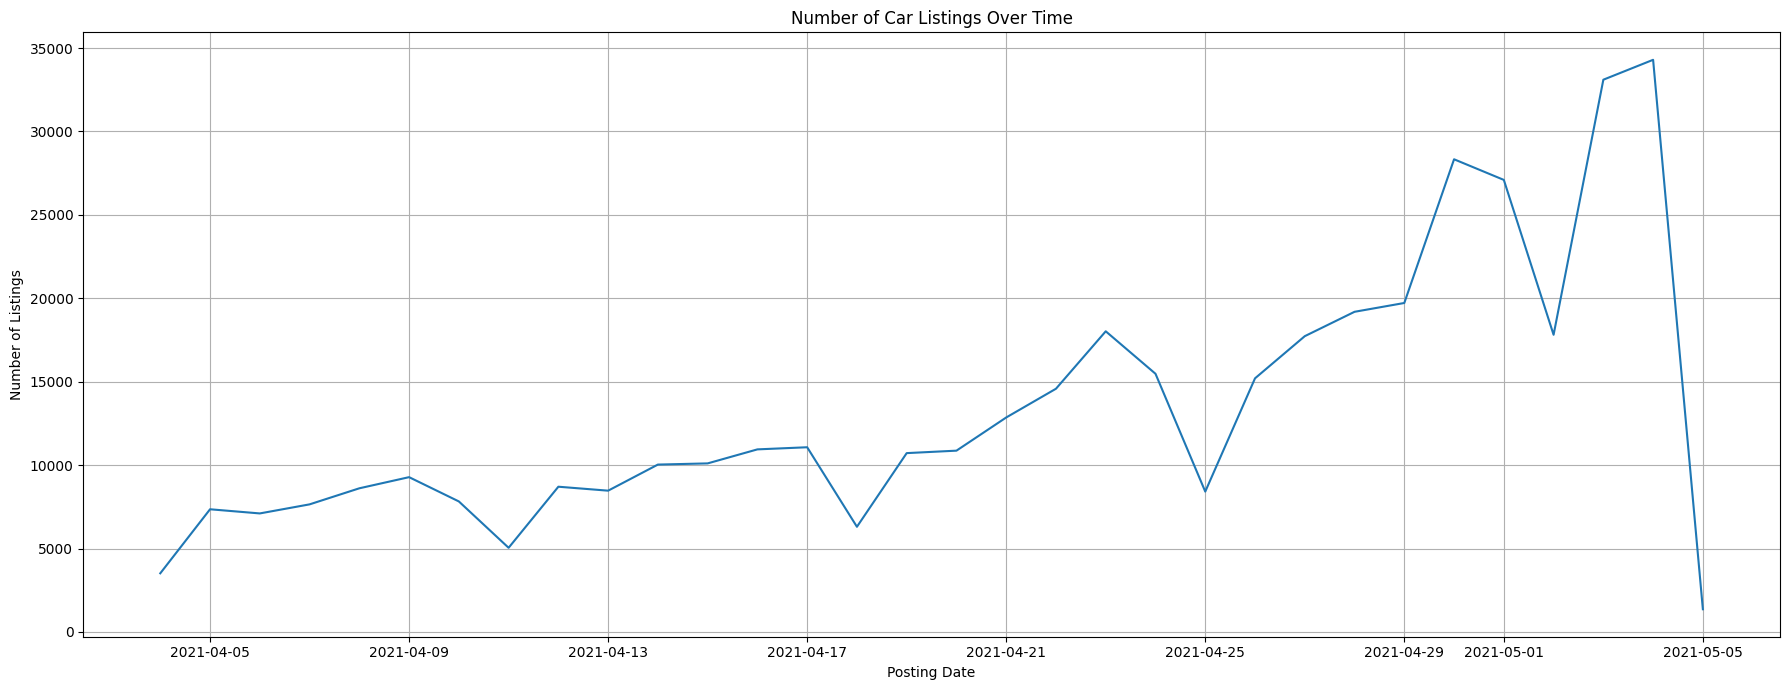

In [ ]:
car_copy['posting_day'] = car_copy['posting_date'].dt.date

posting_counts = car_copy['posting_day'].value_counts().sort_index()

plt.figure(figsize=(18, 7))
posting_counts.plot(kind='line')
plt.title('Number of Car Listings Over Time')
plt.xlabel('Posting Date')
plt.ylabel('Number of Listings')
plt.grid(True)
plt.tight_layout()
plt.show()

### `year`

In [ ]:
car['year'].describe()

,year
count,425675.000000
mean,2011.235191
std,9.452120
min,1900.000000
25%,2008.000000
50%,2013.000000
75%,2017.000000
max,2022.000000


Bỏ những giá trị `year` nhỏ hơn 1981 và lớn hơn 2021.

### Tạo cột mới `age`:

In [ ]:
car_copy['posting_year'] = car_copy['posting_date'].dt.year
car_copy['age'] = car_copy['posting_year'] - car_copy['year']

### `odometer`

In [ ]:
car['odometer'].isna().sum()

np.int64(4400)

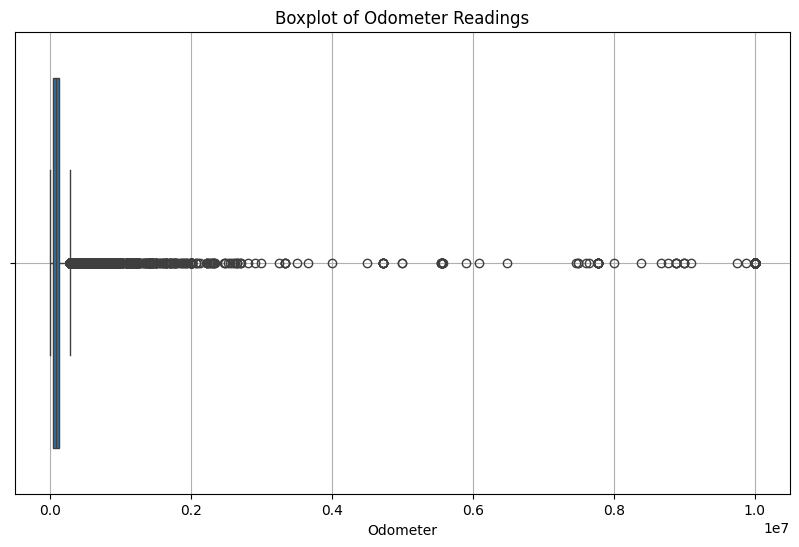

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=car_copy['odometer'].dropna())
plt.title('Boxplot of Odometer Readings')
plt.xlabel('Odometer')
plt.grid(True)
plt.show()

In [ ]:
print(car_copy['odometer'].describe())

count    4.224800e+05
mean     9.804333e+04
std      2.138815e+05
min      0.000000e+00
25%      3.770400e+04
50%      8.554800e+04
75%      1.335425e+05
max      1.000000e+07
Name: odometer, dtype: float64


Cột này cũng có nhiều giá trị ngoại lai, nhưng cũng không thể áp dụng các phương pháp loại bỏ thông thường mà phải loại bỏ giá trị không hợp lệ (lớn hơn 500000).

## Thuộc tính phân loại

In [ ]:
categorical_data = car_copy.select_dtypes(include='object')
categorical_features=categorical_data.columns.tolist()

print(f'There are {len(categorical_features)} categorical features:', '\n')
print(categorical_features)

There are 12 categorical features: 

['manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive', 'type', 'paint_color', 'state', 'posting_day']


In [ ]:
# Thống kê các giá trị duy nhất
print(categorical_data.nunique(dropna=False))

manufacturer       43
model           29668
condition           7
cylinders           9
fuel                6
title_status        7
transmission        4
drive               4
type               14
paint_color        13
state              51
posting_day        33
dtype: int64


In [ ]:
print(round(car_copy[categorical_features].isnull().sum().sort_values(ascending=False)/len(car_copy)*100,2))

cylinders       41.62
condition       40.79
drive           30.59
paint_color     30.50
type            21.75
manufacturer     4.13
title_status     1.93
model            1.24
fuel             0.71
transmission     0.60
posting_day      0.02
state            0.00
dtype: float64


Cột năm phải chính xác tương ứng với hãng xe và mẫu xe, nên không thể dùng điền khuyết thông thường. Ngoài ra, số lượng thiếu ít, nên bỏ những dòng có dữ liệu thiếu. Loại bỏ những năm nhỏ hơn 1981 vì đây là những xe cổ, không thể dùng các mô hình tuyến tính để dự đoán giá, và những năm lớn hơn năm của `posting_date` là 2021.

### `manufacturer`

/tmp/ipython-input-3207861615.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='manufacturer', data=car_copy, order=car_copy['manufacturer'].value_counts().index, palette='viridis', legend=False)


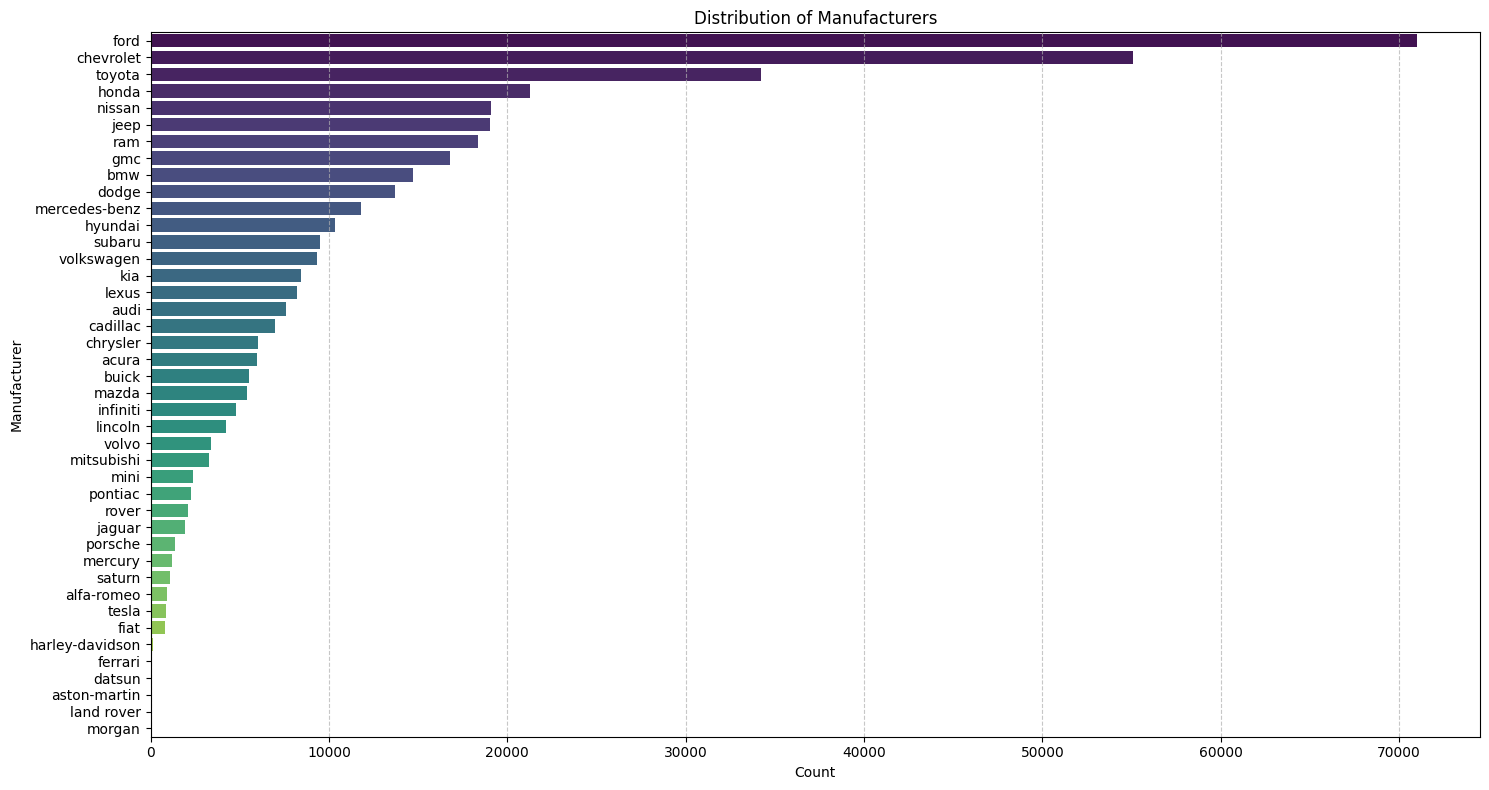

In [ ]:
# Bar chart
plt.figure(figsize=(15, 8))
sns.countplot(y='manufacturer', data=car_copy, order=car_copy['manufacturer'].value_counts().index, palette='viridis', legend=False)
plt.title('Distribution of Manufacturers')
plt.xlabel('Count')
plt.ylabel('Manufacturer')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Một số thuộc tính với ít phân loại

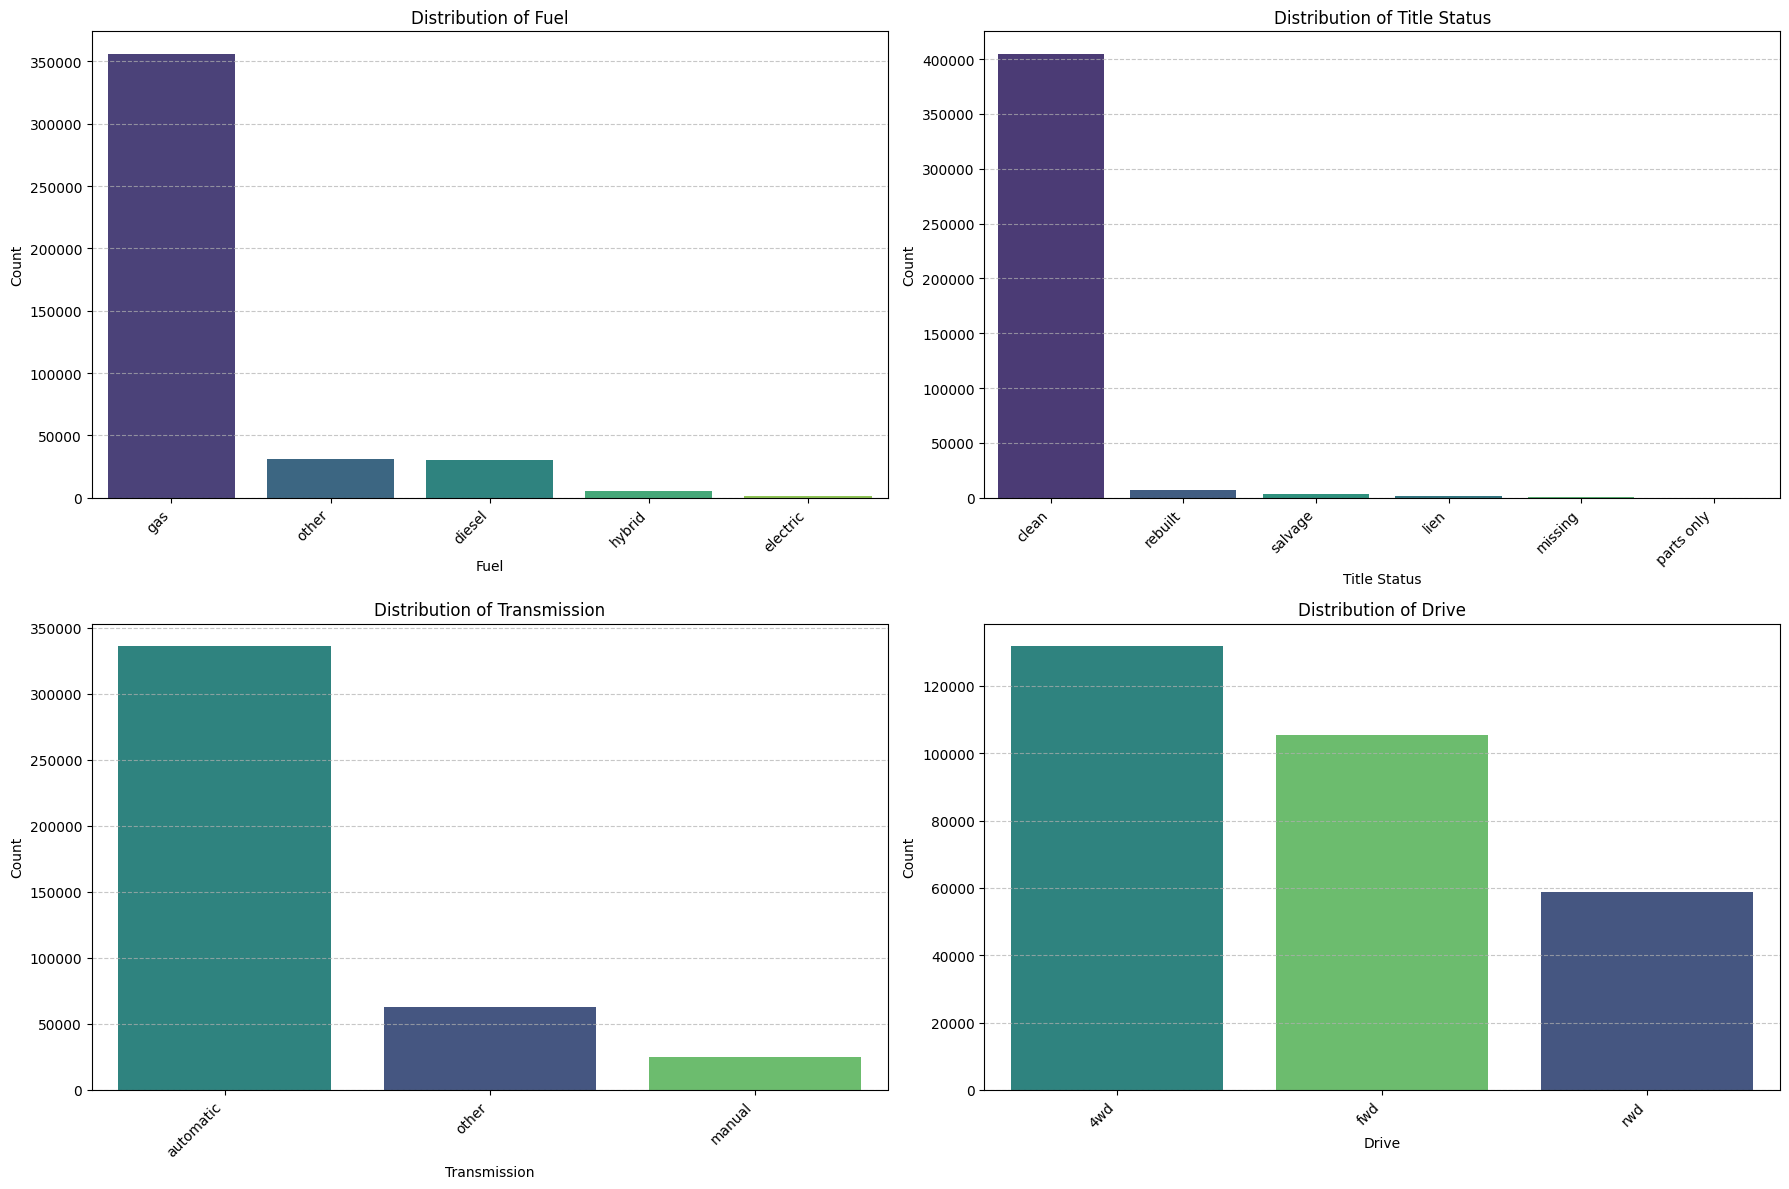

In [ ]:
selected_categorical_features = ['fuel', 'title_status', 'transmission', 'drive']

plt.figure(figsize=(18, 12))

for i, feature in enumerate(selected_categorical_features):
    plt.subplot(2, 2, i + 1)
    sns.countplot(x=feature, data=car_copy, order=car_copy[feature].value_counts().index, palette='viridis', hue=feature, legend=False)
    plt.title(f'Distribution of {feature.replace("_", " ").title()}')
    plt.xlabel(feature.replace("_", " ").title())
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()



*   Thay thế giá trị thiếu của các cột có tỷ lệ thiếu đáng kể (>4%) bằng `unknown`, tỷ lệ thiếu nhỏ bằng trung vị.
*   Mã hoá các cột có giá trị duy nhất lớn (>10) bằng Target Encoder, còn lại mã hoá bằng One Hot Encoder.



# **Phân tích đa biến**

## Biến số vs Biến số

### `price` vs `odometer`

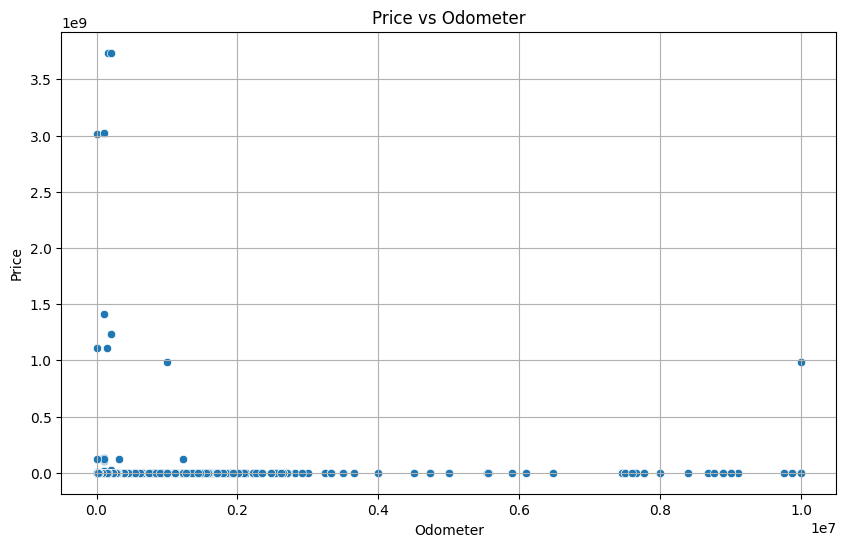

In [ ]:
# Scatter plot giữa 'price' và 'odometer'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='odometer', y='price', data=car_copy)
plt.title('Price vs Odometer')
plt.xlabel('Odometer')
plt.ylabel('Price')
plt.grid(True)
plt.show()



*   Xu hướng chung: giá xe giảm khi số dặm (odometer) tăng, cho thấy xe chạy nhiều thường rẻ hơn.
*   Xuất hiện ngoại lệ: xe chạy rất nhiều nhưng giá vẫn cao, hoặc xe chạy ít nhưng giá thấp, do các yếu tố khác như hư hỏng, thương hiệu, dòng xe, hoặc tuổi xe.



### `price` vs `age`

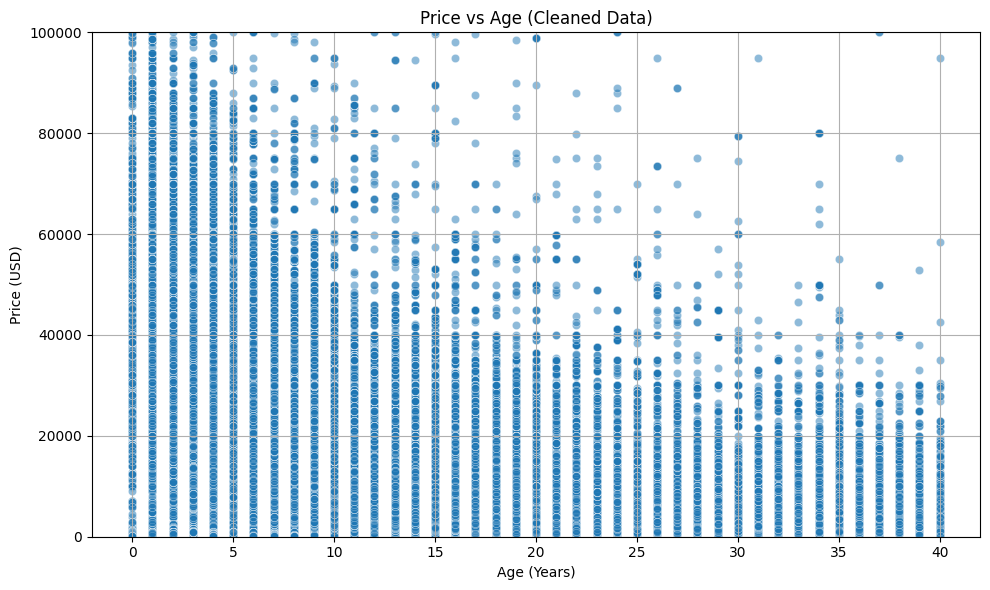

In [ ]:
df_for_age_analysis = car_copy.copy()
df_for_age_analysis['posting_date'] = pd.to_datetime(df_for_age_analysis['posting_date'], errors='coerce', utc=True)
df_for_age_analysis['posting_year'] = df_for_age_analysis['posting_date'].dt.year
df_for_age_analysis.dropna(subset=['year', 'posting_year'], inplace=True)
df_for_age_analysis = df_for_age_analysis[(df_for_age_analysis['year'] >= 1981) & (df_for_age_analysis['year'] <= 2021)]

df_for_age_analysis['age'] = df_for_age_analysis['posting_year'] - df_for_age_analysis['year']

df_for_age_analysis = df_for_age_analysis[df_for_age_analysis['age'] >= 0]

df_for_age_analysis = df_for_age_analysis[(df_for_age_analysis['price'] >= 100) & (df_for_age_analysis['price'] <= 100000)]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='price', data=df_for_age_analysis, alpha=0.5) # Add alpha for better visibility of dense areas
plt.title('Price vs Age (Cleaned Data)')
plt.xlabel('Age (Years)')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.ylim(0, 100000)
plt.tight_layout()
plt.show()

### Ma trận tương quan

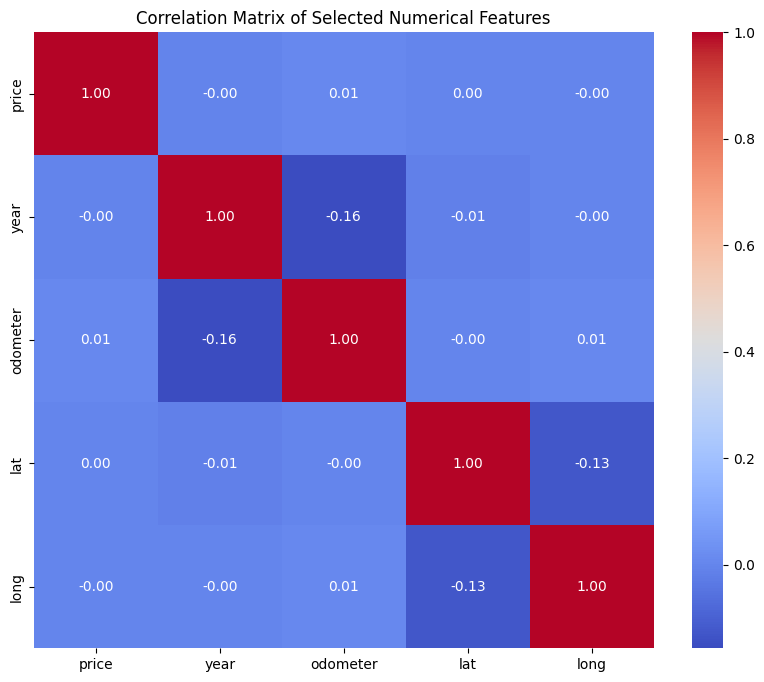

In [ ]:
selected_numerical_features = ['price', 'year', 'odometer', 'lat', 'long']
correlation_matrix = car_copy[selected_numerical_features].corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Selected Numerical Features')
plt.show()

Ma trận tương quan cho thấy mức liên hệ giữa các biến gần như bằng không. Không có cặp nào tạo ra quan hệ tuyến tính đáng chú ý.

## Biến số vs Biến phân loại

### `price` vs `manufacturer`

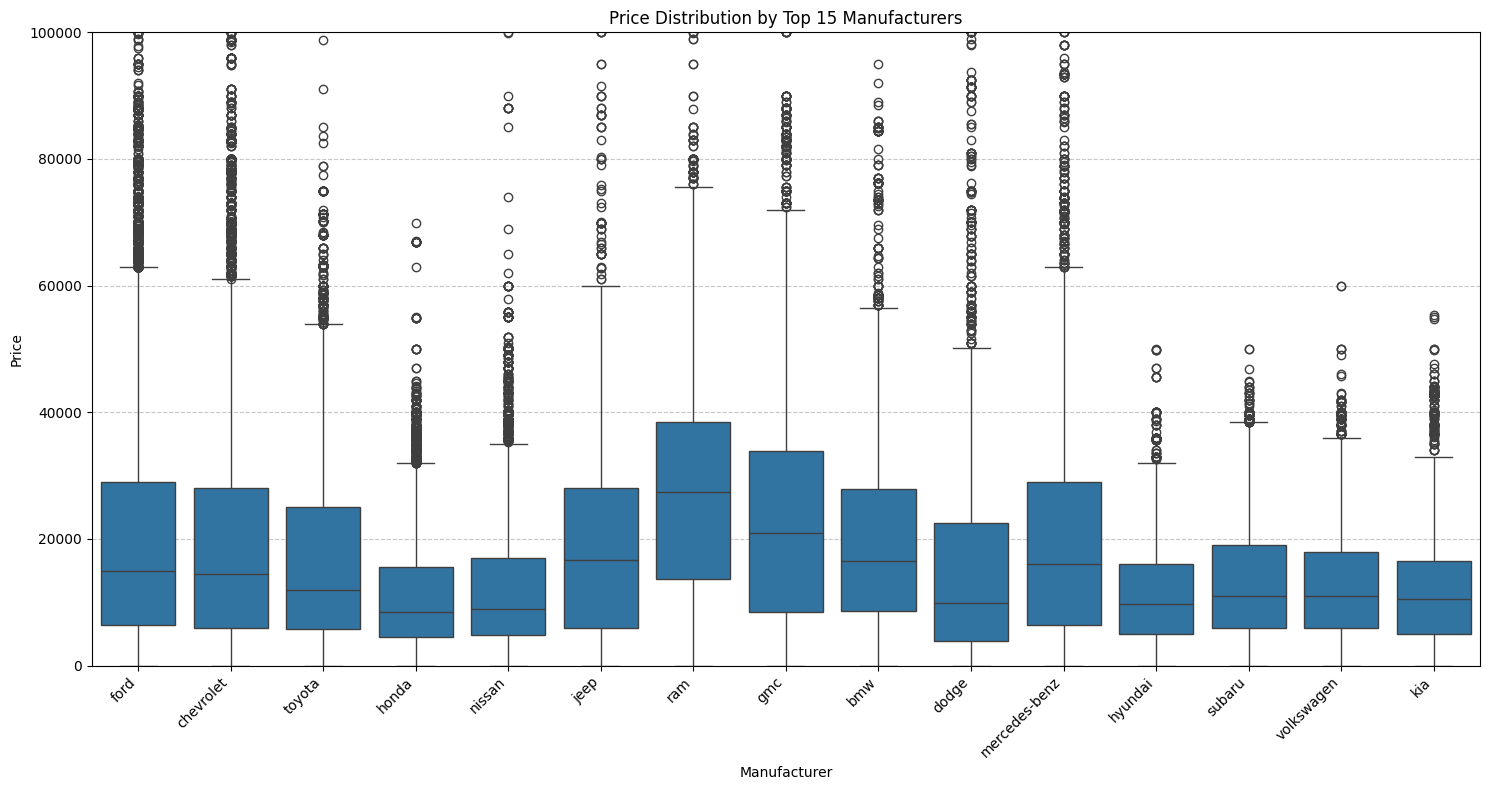

In [ ]:
top_manufacturers = car_copy['manufacturer'].value_counts().nlargest(15).index
filtered_manufacturer_data = car_copy[car_copy['manufacturer'].isin(top_manufacturers)]

plt.figure(figsize=(15, 8))
sns.boxplot(x='manufacturer', y='price', data=filtered_manufacturer_data.dropna(subset=['manufacturer', 'price']), order=top_manufacturers)
plt.title('Price Distribution by Top 15 Manufacturers')
plt.xlabel('Manufacturer')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 100000)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Tiếp theo, hãy xem mối quan hệ giữa `price` và `model`. Vì có rất nhiều `model` khác nhau, chúng ta sẽ chỉ xem xét 15 `model` phổ biến nhất.

### `price` vs `model`

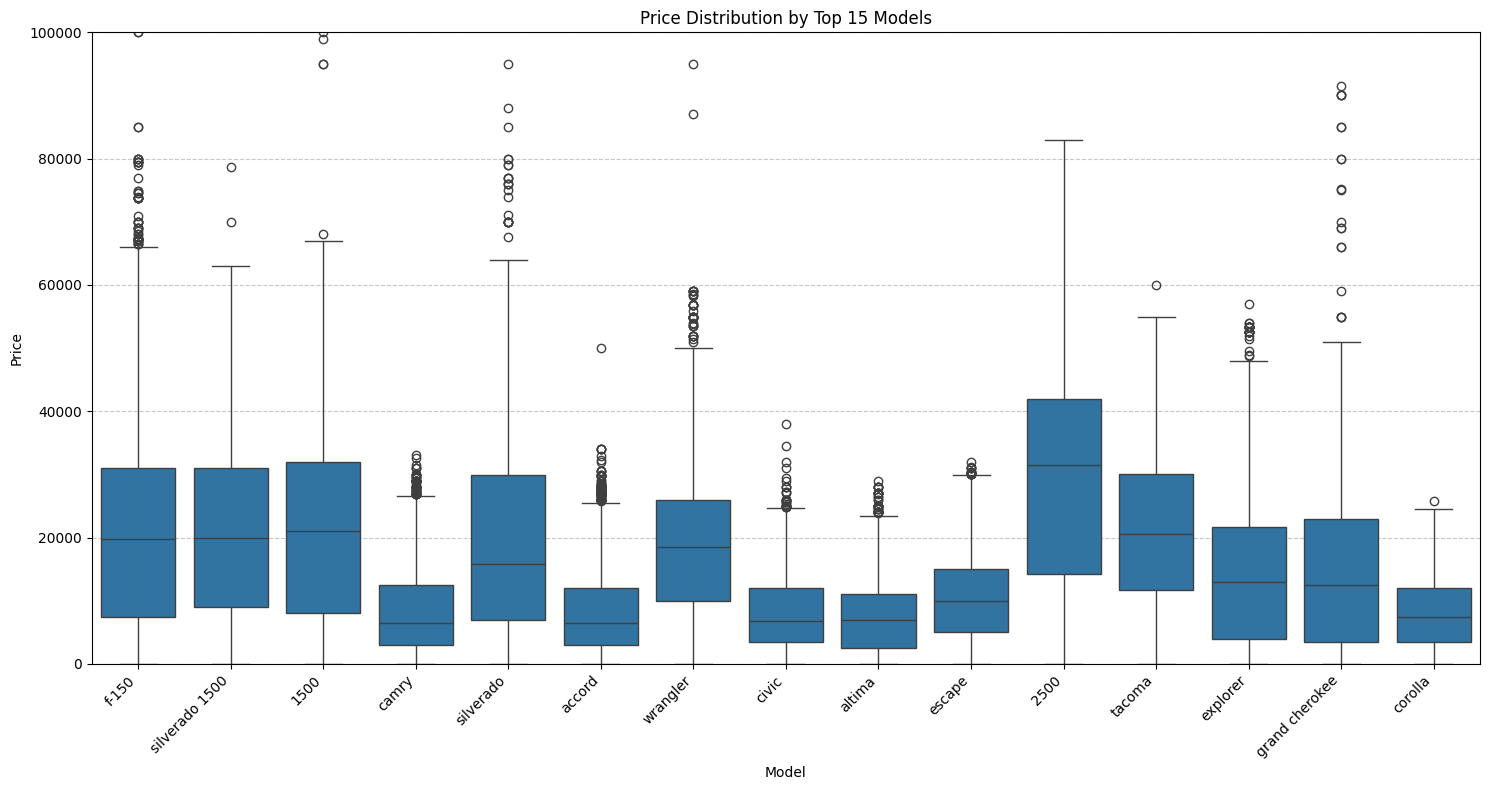

In [ ]:
top_models = car_copy['model'].value_counts().nlargest(15).index

filtered_model_data = car_copy[car_copy['model'].isin(top_models)]

plt.figure(figsize=(15, 8))
sns.boxplot(x='model', y='price', data=filtered_model_data.dropna(subset=['model', 'price']), order=top_models)
plt.title('Price Distribution by Top 15 Models')
plt.xlabel('Model')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 100000)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()